In [166]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42


In [167]:
# Parameter defiition
#A = 0.05# lesser activity ratio of MPF-p
#k1_wee1 = 0.05# inhibitory phophorylation of MPF by inactive wee1
#k2_wee1 = 2.5# inhibitory phophorylation of MPF by active wee1
#k1_cdc25 = 0.05# dephosphorylation of MPF by inactive cdc25
#k2_cdc25 = 2.5# dephosphorylation of MPF by active cdc25
#V1_wee1 = 0.125# dephosphorylation of wee1p to wee1
#J1_wee1 = 0.01# MM constant for wee1p-to-wee1
#V2_wee1 = 0.625# phosphorylation of wee1 by MPF (modified from the original duplication notation, k_wee1)
#J2_wee1 = 0.01# MM constant for wee1-to-wee1p
#V1_cdc25 = 1.0
#J1_cdc25 = 0.01
#V2_cdc25 = 0.2
#J2_cdc25 = 0.01

#total_MPF = 1.0
#total_wee1 = 1.0
#total_cdc25 = 1.0

#
#model equations that define time derivatives of signal levels
par_names = ['A', 'k1_wee1', 'k2_wee1', 'k1_cdc25', 'k2_cdc25', 'V1_wee1', 'J1_wee1', 'V2_wee1', 'J2_wee1', 'V1_cdc25', 'J1_cdc25', 'V2_cdc25', 'J2_cdc25', 'total_MPF', 'total_wee1', 'total_cdc25']
def show_params(params):
    params_gerard = initialize_params_gerard()
    for n, par_name in enumerate(par_names):
        s = '' if params[n] == params_gerard[n] else '(modified)'
        print(par_name, ': ', params[n], s)

def initialize_params_gerard():
    return np.array([0.05, 0.05, 2.5, 0.05, 2.5, 0.125, 0.01, 0.625, 0.01, 1.0, 0.01, 0.2, 0.01, 1.0, 1.0, 1.0])

def get_param(params, par_name = 'A'):
    try:
        idx = par_names.index(par_name)
        return params[idx]
    except:
        print('invalid parameter name!!')
        return -1

def change_params(params, par_value = 0.05, par_name = 'A'):
    try:
        idx = par_names.index(par_name)
        params[idx] = par_value
        return params
    except:
        print('invalid parameter name!! params not modified')
        return params

def model_func(x, time, params):
    # State variables
    MPF = x[0]
    wee1 = x[1]
    cdc25p = x[2]
    # Parameters
    A = params[0]
    k1_wee1 = params[1]
    k2_wee1 = params[2]
    k1_cdc25 = params[3]
    k2_cdc25 = params[4]
    V1_wee1 = params[5]
    J1_wee1 = params[6]
    V2_wee1 = params[7]
    J2_wee1 = params[8]
    V1_cdc25 = params[9]
    J1_cdc25 = params[10]
    V2_cdc25 = params[11]
    J2_cdc25 = params[12]
    total_MPF = params[13]
    total_wee1 = params[14]
    total_cdc25 = params[15]
    # Dynamics
    MPF_activity = MPF + A*(total_MPF - MPF)
    wee1_activity = k1_wee1* (total_wee1 - wee1) + k2_wee1 * wee1
    cdc25_activity = k1_cdc25*(total_cdc25 - cdc25p) + k2_cdc25*cdc25p
    f = np.zeros((3,))
    f[0] = - wee1_activity*MPF + cdc25_activity*(total_MPF - MPF)
    f[1] = V1_wee1*(total_wee1 - wee1) / (J1_wee1 + total_wee1 - wee1) - V2_wee1*MPF_activity * wee1 / (J2_wee1 + wee1)
    f[2] = V1_cdc25*MPF_activity*(total_cdc25 - cdc25p)/(J1_cdc25 + total_cdc25 - cdc25p) - V2_cdc25*cdc25p/(J2_cdc25 + cdc25p)
    return f

#
# check parameter set in Gerard, PLoS Comp Biol, 2015
#
params = initialize_params_gerard()
show_params(params)
print(get_param(params, 'k2_wee1'))
#
# modify total_MPF value
#
params = change_params(params, 0.1, 'total_MPF')
show_params(params)

A :  0.05 
k1_wee1 :  0.05 
k2_wee1 :  2.5 
k1_cdc25 :  0.05 
k2_cdc25 :  2.5 
V1_wee1 :  0.125 
J1_wee1 :  0.01 
V2_wee1 :  0.625 
J2_wee1 :  0.01 
V1_cdc25 :  1.0 
J1_cdc25 :  0.01 
V2_cdc25 :  0.2 
J2_cdc25 :  0.01 
total_MPF :  1.0 
total_wee1 :  1.0 
total_cdc25 :  1.0 
2.5
A :  0.05 
k1_wee1 :  0.05 
k2_wee1 :  2.5 
k1_cdc25 :  0.05 
k2_cdc25 :  2.5 
V1_wee1 :  0.125 
J1_wee1 :  0.01 
V2_wee1 :  0.625 
J2_wee1 :  0.01 
V1_cdc25 :  1.0 
J1_cdc25 :  0.01 
V2_cdc25 :  0.2 
J2_cdc25 :  0.01 
total_MPF :  0.1 (modified)
total_wee1 :  1.0 
total_cdc25 :  1.0 


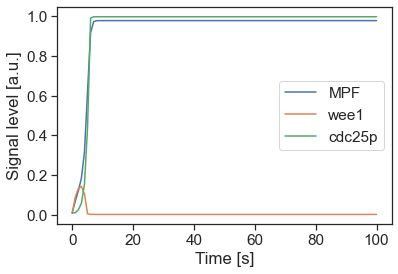

In [168]:
#
# Numetical integration.
# 'odeint'  uses Adams methods for non-stiff systems and backward differentiation formula methods for stiff systems.
#
sns.set(style='ticks', font_scale=1.4)
time_points = np.linspace(0, 100, 100)# define timepoints for ode solver
xinit = 0.1 * np.array([0.1, 0.1, 0.1])
pars = initialize_params_gerard()
xvec = integrate.odeint(model_func, xinit, time_points, args=(pars,))
#
# Plot simulation result
#
plt.plot(time_points, xvec[:, 0], label='MPF')
plt.plot(time_points, xvec[:, 1], label='wee1')
plt.plot(time_points, xvec[:, 2], label='cdc25p')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Signal level [a.u.]')
plt.show()

In [ ]:
#
# phase diagram
#
n_points = 10000
n_points2 = 50
vs_wee1 = 0.9*np.logspace(0, 1, num=n_points2)# wee1
vs_wee1[-1] = 1
ws_wee1 = 5*np.logspace(-1, 0, num=n_points)# total MPF
print(vs_wee1)

MPF_norm_wee1 = np.zeros((n_points, n_points2))
MPF_unnorm_wee1 = np.zeros_like(MPF_norm_wee1)
MPF_activities_wee1 = np.zeros_like(MPF_norm_wee1)
time_points = np.linspace(0, 2000, 20000)
params = initialize_params_gerard()
for n1, v in enumerate(vs_wee1):
    for n2, w in enumerate(ws_wee1):
        params = change_params(params, v, 'total_wee1')
        params = change_params(params, w, 'total_MPF')
        params = change_params(params, 1.0, 'total_cdc25')
        xinit = [0.05*w, 0.95*v, 0.05*1.0]
        xvec = integrate.odeint(model_func, xinit, time_points, args=(params,))
        active_MPF = np.mean(xvec[-1000:, 0])
        temp_total_MPF = get_param(params, 'total_MPF')
        temp_A = get_param(params, 'A')
        MPF_norm_wee1[n2, n1] = active_MPF / temp_total_MPF
        MPF_unnorm_wee1[n2, n1] = active_MPF
        MPF_activities_wee1[n2, n1] = active_MPF + temp_A*(temp_total_MPF - active_MPF)
        if n2 == 0 and n1%10 == 0:
            print(n1, " th total wee1 level examined.")

xticklabels = [f"{v:.1f}" for v in vs_wee1]
yticklabels = [f"{w:.1f}" for w in ws_wee1]
fig, ax = plt.subplots(figsize=(12, 10))
s = sns.heatmap(MPF_norm_wee1, xticklabels=xticklabels, yticklabels=yticklabels)
s.invert_yaxis()
s.set(xlabel='total wee1', ylabel='total MPF', title='active MPF / total MPF')

fig, ax = plt.subplots(figsize=(10, 10))
for n in range(n_points2):
    #if int(n%20) != 0:
    #    continue
    ax.semilogx(ws_wee1, MPF_unnorm_wee1[:, n])
ax.set_ylim(0, 1.0)
ax.set_xlabel('total MPF')
ax.set_ylabel('amount of active MPF')

fig, ax = plt.subplots(figsize=(10, 10))
CDKatCPs_wee1 = []
thr = 2
for n in range(n_points2):
    temp = [MPF_activities_wee1[:, n][i+1]/MPF_activities_wee1[:, n][i] for i in range(len(MPF_activities_wee1[:, n]) - 1)]
    temp2 = [0 if i < thr else 1 for i in temp]
    CP = np.argmax(temp2)
    CDKatCPs_wee1.append(MPF_activities_wee1[:, n][CP])
    #if int(n%20) != 0:
    #    continue
    ax.semilogx(ws_wee1, MPF_activities_wee1[:, n])
    ax.scatter(ws_wee1[CP], MPF_activities_wee1[:, n][CP], color="red",s=100)
ax.set_ylim(0, 1.0)
ax.set_xlabel('total MPF')
ax.set_ylabel('MPF activity')

print(np.array(vs_wee1).shape)
print(np.array(CDKatCPs_wee1).shape)
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(vs_wee1, CDKatCPs_wee1)
#ax.set_ylim(0, 1.0)
ax.set_xscale("symlog")
ax.set_xlabel('wee1 level')
ax.set_ylabel('MPF activity at change point')


In [ ]:
n_points = 10000
n_points2 = 50
vs_cdc25 = 0.9*np.logspace(0, 1.4, num=n_points2)# total cdc25
vs_cdc25[-1] = 1
ws_cdc25 = 3*np.logspace(-1, 0, num=n_points)# total MPF
print(vs_cdc25)

MPF_norm_cdc25 = np.zeros((n_points, n_points2))
MPF_unnorm_cdc25 = np.zeros_like(MPF_norm_cdc25)
MPF_activities_cdc25 = np.zeros_like(MPF_norm_cdc25)
time_points = np.linspace(0, 200, 2000)
for n1, v in enumerate(vs_cdc25):
    for n2, w in enumerate(ws_cdc25):
        params = change_params(params, 1.0, 'total_wee1')
        params = change_params(params, w, 'total_MPF')
        params = change_params(params, v, 'total_cdc25')
        xinit = [0.05*w, 0.95*1.0, 0.05*v]
        xvec = integrate.odeint(model_func, xinit, time_points, args=(params,))
        active_MPF = np.max(xvec[1500:, 0])
        temp_total_MPF = get_param(params, 'total_MPF')
        temp_A = get_param(params, 'A')
        MPF_norm_cdc25[n2, n1] = active_MPF / temp_total_MPF
        MPF_unnorm_cdc25[n2, n1] = active_MPF
        MPF_activities_cdc25[n2, n1] = active_MPF + temp_A*(temp_total_MPF - active_MPF)
        if n2 == 0 and n1%10 == 0:
            print(n1, " th total cdc25 level examined.")

xticklabels = [f"{v:.1f}" for v in vs_cdc25]
yticklabels = [f"{w:.1f}" for w in ws_cdc25]
fig, ax = plt.subplots(figsize=(12, 10))
s = sns.heatmap(MPF_norm_cdc25, xticklabels=xticklabels, yticklabels=yticklabels)
s.invert_yaxis()
s.set(xlabel='total cdc25', ylabel='total MPF', title='active MPF / total MPF')

fig, ax = plt.subplots(figsize=(10, 10))
for n in range(n_points2):
    ax.semilogx(ws_cdc25, MPF_unnorm_cdc25[:, n])
ax.set_ylim(0, 1.0)
ax.set_xlabel('total MPF')
ax.set_ylabel('amount of active MPF')

fig, ax = plt.subplots(figsize=(10, 10))
CDKatCPs_cdc25 = []
thr = 2
for n in range(n_points2):
    temp = [MPF_activities_cdc25[:, n][i+1]/MPF_activities_cdc25[:, n][i] for i in range(len(MPF_activities_cdc25[:, n]) - 1)]
    temp2 = [0 if i < thr else 1 for i in temp]
    CP = np.argmax(temp2)
    CDKatCPs_cdc25.append(MPF_activities_cdc25[:, n][CP])
    if int(n%10) != 0:
        continue
    ax.semilogx(ws_cdc25, MPF_activities_cdc25[:, n])
    ax.scatter(ws_cdc25[CP], MPF_activities_cdc25[:, n][CP], color="red",s=100)
ax.set_ylim(0, 1.0)
ax.set_xlabel('total MPF')
ax.set_ylabel('MPF activity')

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(vs_cdc25, CDKatCPs_cdc25)
#ax.set_ylim(0, 1.0)
ax.set_xscale("log")
ax.set_xlabel('cdc25 level')
ax.set_ylabel('MPF activity at change point')


In [ ]:
import math
cm = plt.get_cmap("Oranges")
fig, ax = plt.subplots(figsize=(10, 10))
CDKatCPs_wee1 = []
thr = 2
for n in range(n_points2):
    temp = [MPF_activities_wee1[:, n][i+1]/MPF_activities_wee1[:, n][i] for i in range(len(MPF_activities_wee1[:, n]) - 1)]
    temp2 = [0 if i < thr else 1 for i in temp]
    CP = np.argmax(temp2)
    CDKatCPs_wee1.append(MPF_activities_wee1[:, n][CP])
    if int(n%10) != 0:
        continue
    print(vs_wee1[n])
    ax.semilogx(ws_wee1[:CP+2], MPF_activities_wee1[:CP+2, n], color=cm(math.log(float(vs_wee1[n]))/2+0.3))
    ax.scatter(ws_wee1[CP], MPF_activities_wee1[:, n][CP], c="#991AE9",s=100)
ax.set_xlim(1, )
ax.set_ylim(0, 0.5)
ax.set_xlabel('total MPF')
ax.set_ylabel('MPF activity')
plt.savefig("./_CDK_wee1OP.png")
plt.savefig("./_CDK_wee1OP.pdf")

fig, ax = plt.subplots(figsize=(6, 3))
ax.scatter(vs_wee1, CDKatCPs_wee1, c="#991AE9")
ax.set_ylim(0.08, 0.18)
ax.set_xlim(0.8, 25)
ax.set_xscale("log")
ax.set_xlabel('wee1 level')
ax.set_ylabel('MPF activity at change point')
plt.savefig("./_CDKatCP_wee1OP.png")
plt.savefig("./_CDKatCP_wee1OP.pdf")

In [ ]:
cm = plt.get_cmap("Greens")
fig, ax = plt.subplots(figsize=(10, 10))
CDKatCPs_cdc25 = []
thr = 2
for n in range(n_points2):
    temp = [MPF_activities_cdc25[:, n][i+1]/MPF_activities_cdc25[:, n][i] for i in range(len(MPF_activities_cdc25[:, n]) - 1)]
    temp2 = [0 if i < thr else 1 for i in temp]
    CP = np.argmax(temp2)
    CDKatCPs_cdc25.append(MPF_activities_cdc25[:, n][CP])
    if int(n%10) != 0:
        continue
    ax.semilogx(ws_cdc25[:CP+2], MPF_activities_cdc25[:CP+2, n], color=cm(math.log(float(vs_cdc25[n]))/4+0.3))
    ax.scatter(ws_cdc25[CP], MPF_activities_cdc25[:, n][CP], c="#991AE9",s=100)
ax.set_ylim(0, 1.0)
ax.set_xlabel('total MPF')
ax.set_ylabel('MPF activity')
plt.savefig("./_CDK_cdc25OP.png")
plt.savefig("./_CDK_cdc25OP.pdf")

fig, ax = plt.subplots(figsize=(6, 3))
ax.scatter(vs_cdc25, CDKatCPs_cdc25, c="#991AE9")
ax.set_ylim(0.08, 0.18)
ax.set_xlim(0.8, 25)
ax.set_xscale("log")
ax.set_xlabel('cdc25 level')
ax.set_ylabel('MPF activity at change point')
plt.savefig("./_CDKatCP_cdc25OP.png")
plt.savefig("./_CDKatCP_cdc25OP.pdf")

meta NOT subset; don't know how to subset; dropped


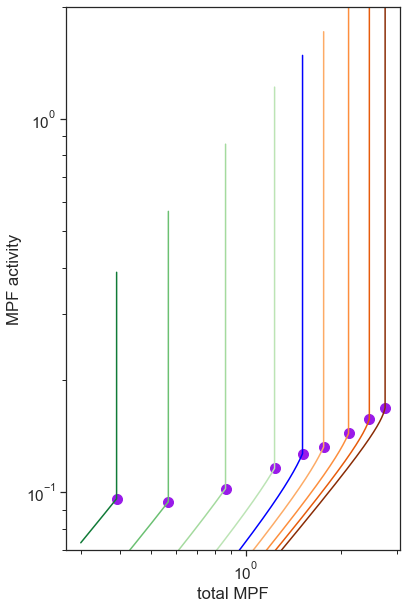

In [215]:
cm2 = plt.get_cmap("Greens")
cm1 = plt.get_cmap("Oranges")
fig, ax = plt.subplots(figsize=(6, 10))
CDKatCPs_cdc25 = []
thr = 2

for n in range(n_points2):
    if n == 0:
        continue
    temp = [MPF_activities_cdc25[:, n][i+1]/MPF_activities_cdc25[:, n][i] for i in range(len(MPF_activities_cdc25[:, n]) - 1)]
    temp2 = [0 if i < thr else 1 for i in temp]
    CP = np.argmax(temp2)
    CDKatCPs_cdc25.append(MPF_activities_cdc25[:, n][CP])
    if int(n%10) != 0:
        continue
    ax.semilogx(ws_cdc25[:CP+2], MPF_activities_cdc25[:CP+2, n], color=cm2(float(vs_cdc25[n])/(float(vs_cdc25[-2]-vs_cdc25[0]))+0.2))
    ax.scatter(ws_cdc25[CP], MPF_activities_cdc25[:, n][CP], c="#991AE9",s=100)

CDKatCPs_wee1 = []
for n in range(n_points2):
    if n == 0:
        continue
    temp = [MPF_activities_wee1[:, n][i+1]/MPF_activities_wee1[:, n][i] for i in range(len(MPF_activities_wee1[:, n]) - 1)]
    temp2 = [0 if i < thr else 1 for i in temp]
    CP = np.argmax(temp2)
    CDKatCPs_wee1.append(MPF_activities_wee1[:, n][CP])
    if int(n%10) != 0 and vs_wee1[n] != 1.0:
        continue
    if vs_wee1[n] == 1.0:
        ax.semilogx(ws_wee1[:CP+2], MPF_activities_wee1[:CP+2, n], color="blue")
        ax.scatter(ws_wee1[CP], MPF_activities_wee1[:, n][CP], c="#991AE9",s=100)
        continue
    ax.semilogx(ws_wee1[:CP+2], MPF_activities_wee1[:CP+2, n], color=cm1(float(vs_wee1[n])/(float(vs_wee1[-2]-vs_wee1[0]))+0.2))
    ax.scatter(ws_wee1[CP], MPF_activities_wee1[:, n][CP], c="#991AE9",s=100)

ax.set_ylim(0.07, 2.0)
ax.set_yscale("log")
ax.set_xlabel('total MPF')
ax.set_ylabel('MPF activity')
plt.savefig("./_CDK_OP_total.png")
plt.savefig("./_CDK_OP_total.pdf")

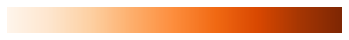

In [195]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots()
ax.imshow(gradient, aspect=10, cmap=plt.cm.Oranges)
ax.set_axis_off()
plt.savefig("./_colorBar_orange.png")
plt.savefig("./_colorBar_orange.pdf")

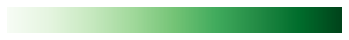

In [194]:
fig, ax = plt.subplots()
ax.imshow(gradient, aspect=10, cmap=plt.cm.Greens)
ax.set_axis_off()
plt.savefig("./_colorBar_green.png")
plt.savefig("./_colorBar_green.pdf")

In [207]:
print(vs_wee1[-2], vs_wee1[0])
print(vs_cdc25[-2], vs_cdc25[0])

8.586859287149947 0.9
21.167573715638632 0.9
